Training with SGD optimizer...
Training with Momentum optimizer...
Training with RMSprop optimizer...
Training with Adam optimizer...


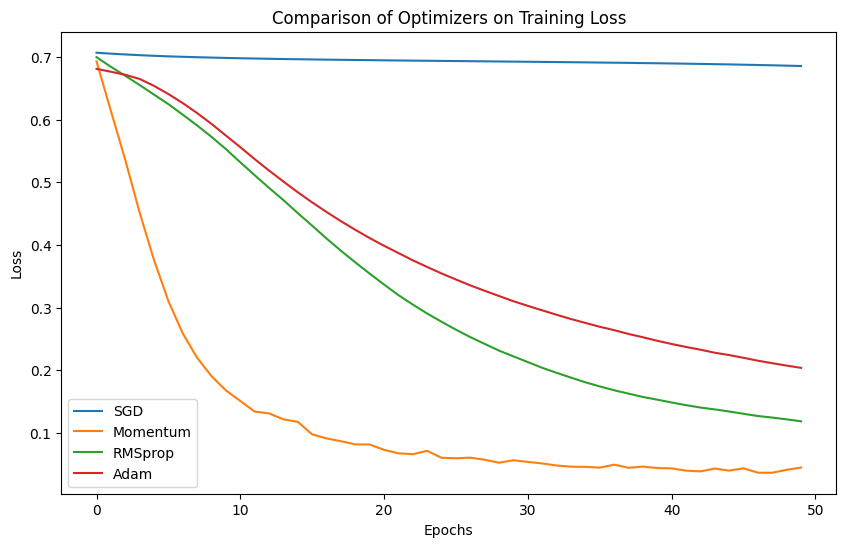

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
x_train = np.random.rand(1000, 2)
y_train = (x_train[:, 0] + x_train[:, 1] > 1).astype(int)  # Simple decision boundary

# Define a simple neural network model
def create_model(optimizer):
    model = keras.Sequential([
        layers.Dense(8, activation='relu', input_shape=(2,)),
        layers.Dense(4, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

optimizers = {
    'SGD': tf.keras.optimizers.SGD(),
    'Momentum': tf.keras.optimizers.SGD(momentum=0.9),
    'RMSprop': tf.keras.optimizers.RMSprop(),
    'Adam': tf.keras.optimizers.Adam()
}

#RMSprop : Bon pour réseaux profonds
#Adam : Meilleur choix général 
history_records = {}

for opt_name, opt in optimizers.items():
    print(f"Training with {opt_name} optimizer...")
    model = create_model(opt)
    history = model.fit(x_train, y_train, epochs=50, batch_size=32, verbose=0)
    history_records[opt_name] = history

# Plot training loss for each optimizer
plt.figure(figsize=(10, 6))
for opt_name, history in history_records.items():
    plt.plot(history.history['loss'], label=opt_name)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Comparison of Optimizers on Training Loss')
plt.legend()
plt.show()

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4952 - accuracy: 0.8484 - val_loss: 0.1757 - val_accuracy: 0.9474
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2801 - accuracy: 0.9185 - val_loss: 0.1369 - val_accuracy: 0.9587
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2371 - accuracy: 0.9315 - val_loss: 0.1218 - val_accuracy: 0.9628
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2087 - accuracy: 0.9394 - val_loss: 0.1066 - val_accuracy: 0.9668
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1916 - accuracy: 0.9427 - val_loss: 0.1070 - val_accuracy: 0.9694
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1808 - accuracy: 0.9465 - val_loss: 0.0956 - val_accuracy: 0.9728
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1685 - accuracy: 0.9503 - val_loss: 0.0947 - val_accuracy:

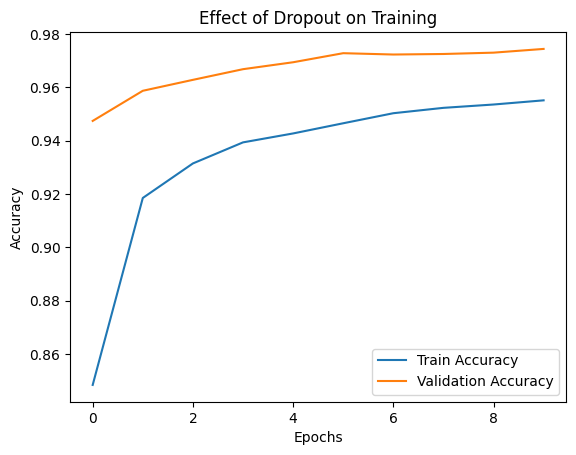

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load MNIST dataset (handwritten digits)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to [0,1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Flatten images from 28x28 to 784
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define the model with Dropout
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dropout(0.5),  # Dropout with 50% probability
    layers.Dense(64, activation='relu'),  # Add another hidden layer
    layers.Dropout(0.3),  # Dropout with 30% probability
    layers.Dense(10, activation='softmax')  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Effect of Dropout on Training')
plt.legend()
plt.show()

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.7423 - accuracy: 0.9014 - val_loss: 0.4806 - val_accuracy: 0.9321
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4618 - accuracy: 0.9306 - val_loss: 0.4015 - val_accuracy: 0.9420
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4027 - accuracy: 0.9404 - val_loss: 0.3600 - val_accuracy: 0.9465
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3663 - accuracy: 0.9450 - val_loss: 0.3593 - val_accuracy: 0.9428
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3416 - accuracy: 0.9486 - val_loss: 0.3111 - val_accuracy: 0.9529
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3276 - accuracy: 0.9499 - val_loss: 0.3095 - val_accuracy: 0.9508
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3143 - accuracy: 0.9517 - val_loss: 0.3276 - val_accura

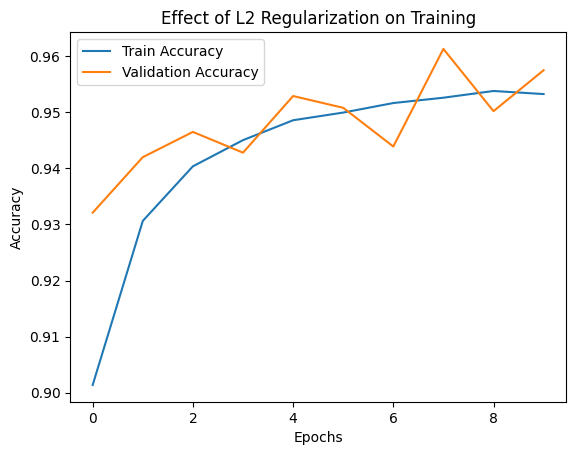

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load MNIST dataset (handwritten digits)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to [0,1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Flatten images from 28x28 to 784
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define the model with L2 Regularization
model = models.Sequential([
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(784,)),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.005)),  # Additional hidden layer with L2
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Effect of L2 Regularization on Training')
plt.legend()
plt.show()

313/313 - 3s - loss: 2.3058 - accuracy: 0.1016 - 3s/epoch - 8ms/step
Précision sur l'ensemble de test: 10.16%
Epoch 1/5
782/782 [==============================] - 41s 51ms/step - loss: 1.5625 - accuracy: 0.4321 - val_loss: 1.3738 - val_accuracy: 0.5110
Epoch 2/5
782/782 [==============================] - 39s 50ms/step - loss: 1.2214 - accuracy: 0.5653 - val_loss: 1.1783 - val_accuracy: 0.5768
Epoch 3/5
782/782 [==============================] - 37s 47ms/step - loss: 1.0704 - accuracy: 0.6210 - val_loss: 1.0736 - val_accuracy: 0.6236
Epoch 4/5
782/782 [==============================] - 33s 42ms/step - loss: 0.9680 - accuracy: 0.6607 - val_loss: 0.9512 - val_accuracy: 0.6675
Epoch 5/5
782/782 [==============================] - 32s 41ms/step - loss: 0.8902 - accuracy: 0.6891 - val_loss: 0.9049 - val_accuracy: 0.6879


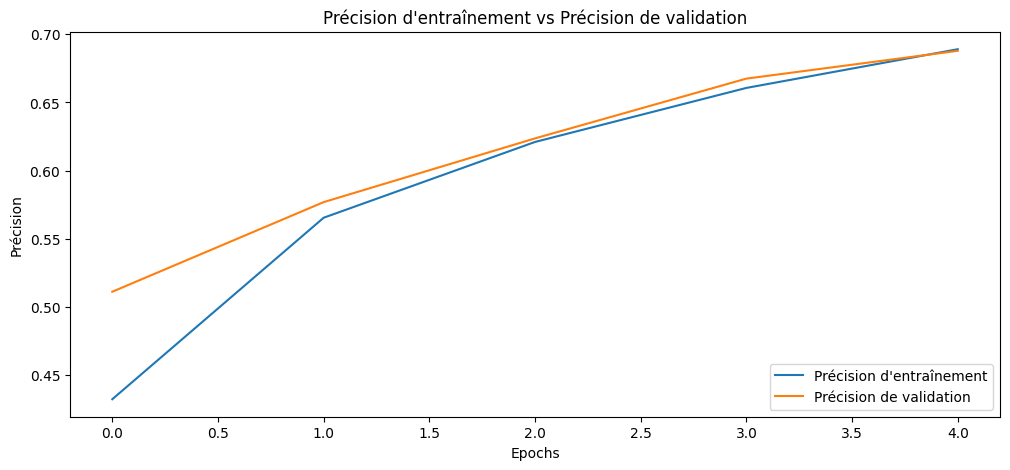

In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, BatchNormalization

# Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize pixel values to [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Définir le modèle
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes de CIFAR-10
])
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Évaluer le modèle sur l'ensemble de test
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Précision sur l'ensemble de test: {test_acc * 100:.2f}%")


# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

# Tracer les courbes de perte et de précision
plt.figure(figsize=(12, 5))

plt.plot(history.history['accuracy'], label='Précision d\'entraînement')
plt.plot(history.history['val_accuracy'], label='Précision de validation')
plt.xlabel('Epochs')
plt.ylabel('Précision')
plt.title('Précision d\'entraînement vs Précision de validation')
plt.legend(loc='lower right')
plt.show()